In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
diabetes_data = pd.read_csv('/content/diabetes.csv')
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
np.random.seed(75)
sample_data = diabetes_data.sample(n=25)

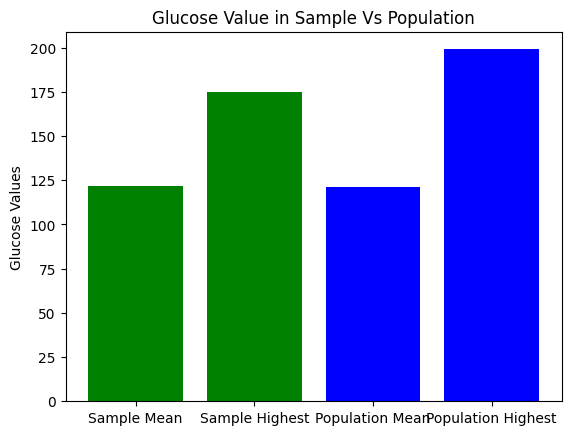

121.64
120.89453125


In [10]:
sample_mean = sample_data['Glucose'].mean()
sample_highest = sample_data['Glucose'].max()

population_mean = diabetes_data['Glucose'].mean()
population_highest = diabetes_data['Glucose'].max()

variables = ['Sample Mean', 'Sample Highest', 'Population Mean', 'Population Highest',]
values = [sample_mean, sample_highest, population_mean, population_highest,]

plt.ylabel('Glucose Values')
plt.title('Glucose Value in Sample Vs Population')
plt.bar(variables, values, color=['green', 'green', 'blue', 'blue'])
plt.show()
print(sample_mean)
print(population_mean)

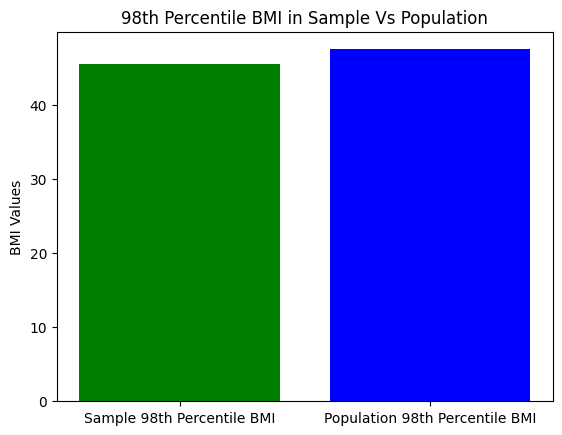

45.552
47.52599999999996


In [12]:
sample_percent = np.percentile(sample_data['BMI'], 98)
population_percentile = np.percentile(diabetes_data['BMI'], 98)

variables = ['Sample 98th Percentile BMI', 'Population 98th Percentile BMI']
values = [sample_percent, population_percentile]


plt.ylabel('BMI Values')
plt.title('98th Percentile BMI in Sample Vs Population')
plt.bar(variables, values, color=['green', 'blue'])
plt.show()
print(sample_percent)
print(population_percentile)

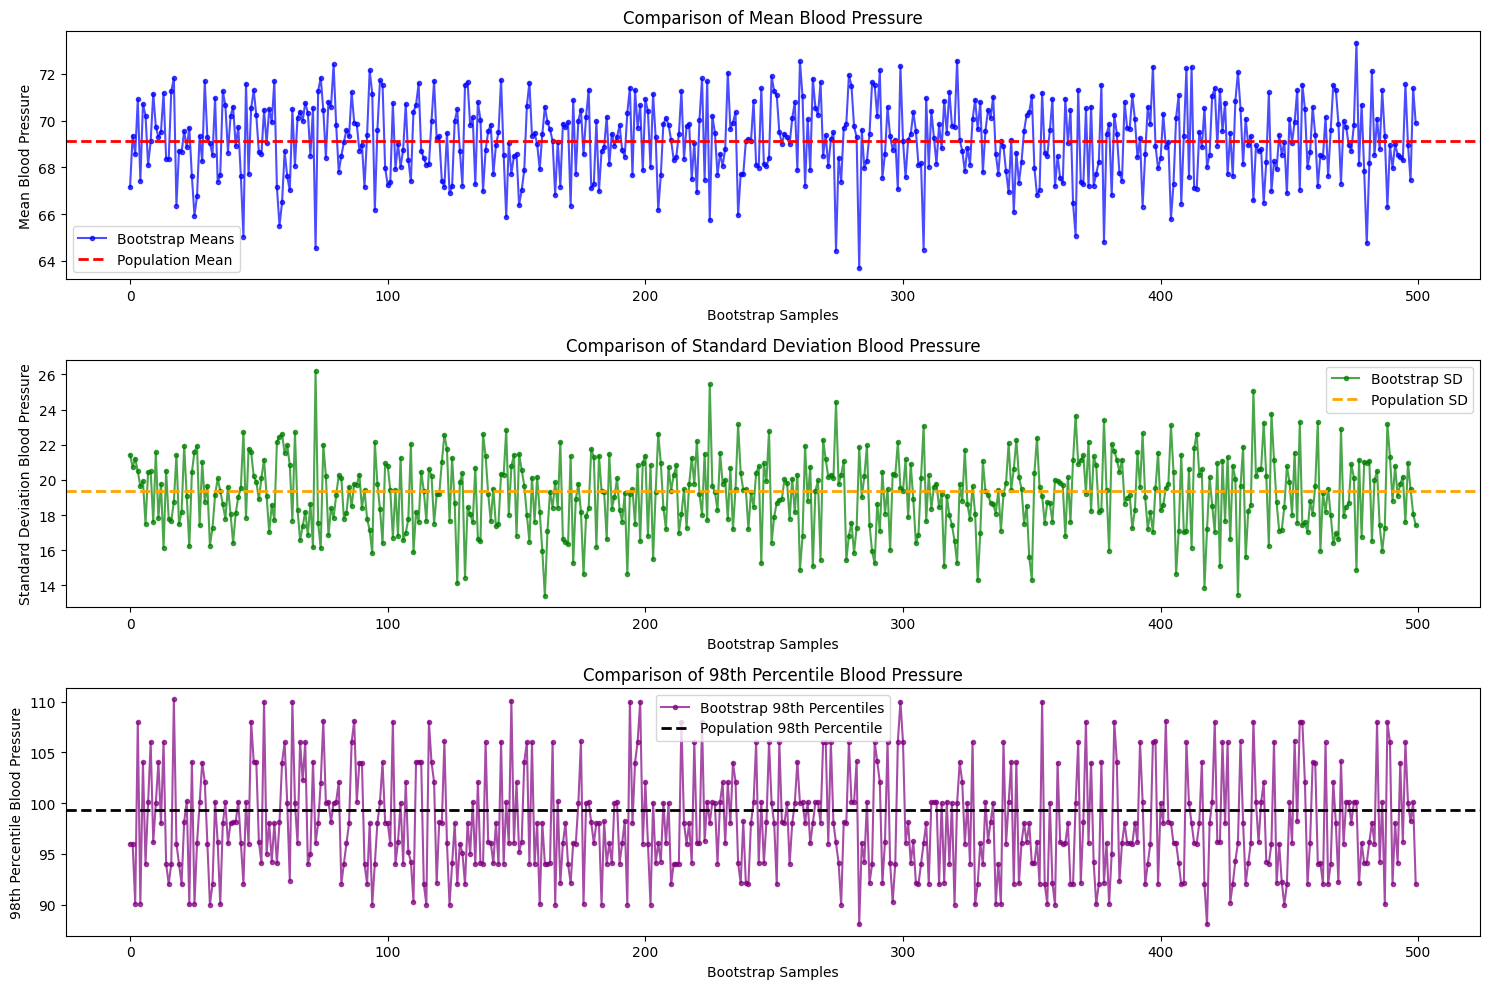

In [24]:
np.random.seed(75)
bootstrap_sample = 500
bootstrap_observation = 150

bootstrap_mean = np.zeros(bootstrap_sample)
bootstrap_SD = np.zeros(bootstrap_sample)
bootstrap_percentile = np.zeros(bootstrap_sample)

for i in range(bootstrap_sample):
    bootstrap_sample = np.random.choice(diabetes_data['BloodPressure'], size=bootstrap_observation, replace=True)
    bootstrap_mean[i] = np.mean(bootstrap_sample)
    bootstrap_SD[i] = np.std(bootstrap_sample)
    bootstrap_percentile[i] = np.percentile(bootstrap_sample, 98)



population_mean_bp = diabetes_data['BloodPressure'].mean()
population_std_dev_bp = diabetes_data['BloodPressure'].std()
population_percentile_bp = np.percentile(diabetes_data['BloodPressure'], 98)



plt.figure(figsize=(15, 10))

plt.subplot(3, 1, 1)
plt.plot(bootstrap_mean, marker='o', linestyle='-', markersize=3, label='Bootstrap Means', color='blue', alpha=0.7)
plt.axhline(y=population_mean_bp, color='red', linestyle='dashed', linewidth=2, label='Population Mean')
plt.title('Comparison of Mean Blood Pressure')
plt.xlabel('Bootstrap Samples')
plt.ylabel('Mean Blood Pressure')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(bootstrap_SD, marker='o', linestyle='-', markersize=3, label='Bootstrap SD', color='green', alpha=0.7)
plt.axhline(y=population_std_dev_bp, color='orange', linestyle='dashed', linewidth=2, label='Population SD')
plt.title('Comparison of Standard Deviation Blood Pressure')
plt.xlabel('Bootstrap Samples')
plt.ylabel('Standard Deviation Blood Pressure')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(bootstrap_percentile, marker='o', linestyle='-', markersize=3, label='Bootstrap 98th Percentiles', color='purple', alpha=0.7)
plt.axhline(y=population_percentile_bp, color='black', linestyle='dashed', linewidth=2, label='Population 98th Percentile')
plt.title('Comparison of 98th Percentile Blood Pressure')
plt.xlabel('Bootstrap Samples')
plt.ylabel('98th Percentile Blood Pressure')
plt.legend()

plt.tight_layout()
plt.show()